In [1]:
import pandas as pd
import geopandas as gpd

# 1. Load OD pairs (CSV with 'origin_hex' and 'destination_hex' columns)
od_df = pd.read_csv('unique_od_pairs.csv', dtype=str)
print(f"OD pairs loaded: {len(od_df)}")
print(od_df.head())

# 2. Load hexagon centroids (with 'id' as hex id)
h3_points = gpd.read_file("h3_points_Helsinki.gpkg")
print(f"Hex centroids loaded: {len(h3_points)}")
print(h3_points.head())

# 3. Load road links shapefile (Digiroad)
links = gpd.read_file(r"Digiroad_data_Networkx1/data/UUSIMAA_2/DR_LINKKI_K.shp")  # Update path if needed
print(f"Road links loaded: {len(links)}")
print(links.head())

# 4. Reproject hex centroids to match road network CRS if needed
if h3_points.crs != links.crs:
    h3_points = h3_points.to_crs(links.crs)
    print("Reprojected hex centroids to match road network CRS.")
else:
    print("CRS already matches.")

print(f"Network CRS: {links.crs}, Points CRS: {h3_points.crs}")


OD pairs loaded: 12272726
        origin_hex  destination_hex
0  891126d2167ffff  891126d3073ffff
1  891126c2683ffff  891126d2167ffff
2  8908996a98bffff  891126d2167ffff
3  8908996d6b3ffff  891126d2167ffff
4  89089961c6fffff  891126d2167ffff
Hex centroids loaded: 8540
                id                   geometry
0  891126d4ecbffff  POINT (25.13214 60.35217)
1  891126d2167ffff  POINT (24.91546 60.23829)
2  891126c319bffff  POINT (25.16207 60.19955)
3  891126da957ffff  POINT (25.11062 60.15520)
4  891126d768bffff  POINT (24.99315 60.27919)
Road links loaded: 136467
                                  LINK_ID  LINK_MMLID SEGM_ID  KUNTAKOODI  \
0  2fb29bc1-45ce-464a-8686-7f5bf171b8aa:1  2070711955   186_0         186   
1  1012a0c6-a551-40a8-979b-52b450ed9fe6:1   329858486   505_1         505   
2  d926f1fb-27a9-4732-8700-56d8e4185608:1  1188175359    49_2          49   
3  9268f4fd-28d0-4cf2-8671-8a93781d7d03:1   395649201    49_3          49   
4  004a3f51-c285-4e60-9637-9c557d7c7c37:1  1

In [2]:
import geopandas as gpd

drivable_types = [1, 2, 3, 4, 5,6,7,9,]  # Update if your data uses different codes
links_drivable = links[links['LINKKITYYP'].isin(drivable_types)].copy()

# Optionally: filter out non-open roads (e.g., LINK_TILA == 3 is 'open')
links = links_drivable[links_drivable['LINK_TILA'] == 3]

h3_points_wgs = h3_points.to_crs(epsg=3067)
h3_polys = gpd.read_file('h3_polygons_Helsinki.gpkg').to_crs(epsg=3067)


In [ ]:
# from folium import GeoJson
# import folium

# # Get mean of hexagon centroids for map center
# center = [
#     h3_points_wgs.geometry.y.mean(),
#     h3_points_wgs.geometry.x.mean()
# ]

# m = folium.Map(location=center, zoom_start=11, tiles="OpenStreetMap")

# folium.GeoJson(
#     links_wgs,
#     name='Road Network',
#     style_function=lambda x: {'color': 'blue', 'weight': 1, 'opacity': 0.6}
# ).add_to(m)


# for _, row in h3_points_wgs.iterrows():
#     folium.CircleMarker(
#         location=[row.geometry.y, row.geometry.x],
#         radius=2,
#         color='red',
#         fill=True,
#         fill_opacity=0.7,
#         opacity=0.7
#     ).add_to(m)
    
# folium.GeoJson(
#     h3_polys,
#     name='Hexagons',
#     style_function=lambda x: {'fillColor': '#b442f5', 'color': '#b442f5', 'weight': 1, 'fillOpacity': 0.08}
# ).add_to(m)

# folium.LayerControl().add_to(m)
# m.save("hex_network_folium_map.html")
# m  # If running in Jupyter/Colab, this will display inline


In [11]:
# h3_points_wgs

id                        geometry  nearest_node  \
0     891126d4ecbffff  POINT (396933.513 6692093.151)          1125   
1     891126d2167ffff  POINT (384579.449 6679772.220)         44785   
2     891126c319bffff  POINT (398111.438 6675053.147)         44305   
3     891126da957ffff  POINT (395118.318 6670196.206)         31638   
4     891126d768bffff  POINT (389018.836 6684193.157)         44054   
...               ...                             ...           ...   
8535  8908996b42bffff  POINT (368704.765 6670564.058)         32190   
8536  89089968393ffff  POINT (374846.351 6675138.365)         33195   
8537  8908996f217ffff  POINT (377424.354 6683373.187)         47331   
8538  89089969e33ffff  POINT (378261.878 6671750.846)         14770   
8539  891126d72bbffff  POINT (391289.874 6684981.066)         46268   

      nearest_node_dist_m  
0               48.470241  
1               41.081996  
2              117.039406  
3             1051.832336  
4               74.960799  
...                   ...  
8535            38.507106  
8536            61.590751  
8537           157.002245  
8538            78.809630  
8539            11.351267  

[8540 rows x 4 columns]

In [ ]:
# from tools.graphio import build_graph_from_Digiroad

# # If your "direction" column is the default 'AJOSUUNTA', you can just call:
# G_full = build_graph_from_Digiroad(links)

# print(f"NetworkX graph created: {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges")


In [ ]:
# import osmnx as ox
# G_test = ox.utils_graph.get_largest_component(G_full, strongly=True) 
# ox.plot_graph(G_test)

In [3]:
from shapely.prepared import prep


from pyrosm import OSM, get_data
osm = OSM(r"Digiroad_data_Networkx1/data/Helsinki_larger_region.osm.pbf")

boundaries = osm.get_boundaries()
zones = boundaries.dissolve(by='boundary')

import json
geojson_dict_data = json.loads(zones.geometry.to_json())['features'][0]['geometry']
geojson_dict_data

zones_buff = zones.geometry.to_crs(3067).buffer(5000, single_sided=True)#.to_crs("EPSG: 4326")#.plot()
geojson_dict_buff = json.loads(zones_buff.geometry.to_json())['features'][0]['geometry']

import shapely
from shapely.geometry import LineString, Point, Polygon

Boundary_ext = zones_buff.geometry.values[0]#LineString(list(zones_buff.geometry.values[0].exterior.coords))
#intersections = polygon_ext.intersection(segment)
links_filtered = links[links.apply(lambda x: Boundary_ext.contains(x.geometry),axis=1)]
links_filtered

LINK_ID  LINK_MMLID    SEGM_ID  \
2       d926f1fb-27a9-4732-8700-56d8e4185608:1  1188175359       49_2   
5       be8de744-7ea3-4cd8-98ec-fddfc9201540:1  1738302468       49_5   
8       8e35e15a-9f21-4351-9e47-788afab3069a:1  1192190540       91_8   
10      fe6de144-f22b-4028-a390-796a9dbcb240:1  1086180620      91_10   
11      f0fcdf1a-de96-4ea3-b2e3-014d7bd45e51:1   388621579      91_11   
...                                        ...         ...        ...   
136460  0252bdcf-ab95-43b0-8c8b-d253ea8933d6:1  1622042435  92_136460   
136461  d95a989c-623a-4866-9e7e-3b8f46afb7ed:1   373399290  92_136461   
136462  d95a989c-623a-4866-9e7e-3b8f46afb7ed:1   373399290  92_136462   
136464  5da3364c-a567-43e4-91ca-75227032182e:1   373399104  92_136464   
136465  638caf65-724f-4144-8f1a-4c7d8685d5ba:1   373378440  92_136465   

        KUNTAKOODI  HALLINN_LK  TOIMINN_LK  LINKKITYYP  TIENUMERO  TIEOSANRO  \
2               49           3           6           3        NaN        NaN   
5               49           2           5           2        NaN        NaN   
8               91           2           6           3        NaN        NaN   
10              91           3           6           3        NaN        NaN   
11              91           2           3           2    40913.0        1.0   
...            ...         ...         ...         ...        ...        ...   
136460          92           3           5           3        NaN        NaN   
136461          92           2           5           3        NaN        NaN   
136462          92           2           5           3        NaN        NaN   
136464          92           2           5           3        NaN        NaN   
136465          92           3           5           3        NaN        NaN   

        SILTA_ALIK  ...  SIJ_TARK  KOR_TARK  ALKU_PAALU  LOPP_PAALU GEOM_FLIP  \
2                0  ...       3.0       0.4       0.000     111.015       1.0   
5                0  ...       3.0       0.4       0.000      13.504       0.0   
8                0  ...       3.0       0.4       0.000       5.971       1.0   
10               0  ...       5.0       0.4       0.000      53.982       0.0   
11               0  ...       7.5       0.4       0.000      42.216       0.0   
...            ...  ...       ...       ...         ...         ...       ...   
136460           0  ...       3.0       0.4       0.000     119.941       0.0   
136461           0  ...       3.0       0.4       0.000      56.765       0.0   
136462           0  ...       3.0       0.4      56.765      59.890       0.0   
136464           0  ...       3.0       0.4       0.000      91.337       1.0   
136465           0  ...       5.0       0.4       0.000      16.686       1.0   

       LINK_TILA GEOM_LAHDE  MTK_TIE_LK  TIEN_KASVU  \
2              3          1       12141         NaN   
5              3          1       12131         NaN   
8              3          1       12141         NaN   
10             3          1       12141         NaN   
11             3          1       12121         1.0   
...          ...        ...         ...         ...   
136460         3          1       12131         NaN   
136461         3          1       12131         NaN   
136462         3          1       12131         NaN   
136464         3          1       12131         NaN   
136465         3          1       12131         NaN   

                                                 geometry  
2       LINESTRING Z (367971.770 6678368.352 27.279, 3...  
5       LINESTRING Z (371775.596 6678294.523 25.944, 3...  
8       LINESTRING Z (391196.552 6672282.843 21.925, 3...  
10      LINESTRING Z (390540.314 6679292.468 16.760, 3...  
11      LINESTRING Z (386764.226 6676860.171 21.270, 3...  
...                                                   ...  
136460  LINESTRING Z (383747.360 6687707.172 40.835, 3...  
136461  LINESTRING Z (390163.296 6690123.993 43.877, 3...  
136462  LINESTRING Z (39021

In [4]:
from tools.graphio import build_graph_from_Digiroad

# If your "direction" column is the default 'AJOSUUNTA', you can just call:
G_full = build_graph_from_Digiroad(links_filtered)

print(f"NetworkX graph created: {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges")

Lasted 2.5 seconds
NetworkX graph created: 49286 nodes, 96805 edges


/run/nvme/job_28609075/tmp/ipykernel_347640/1237190108.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_full = ox.utils_graph.get_largest_component(G_full, strongly=True)


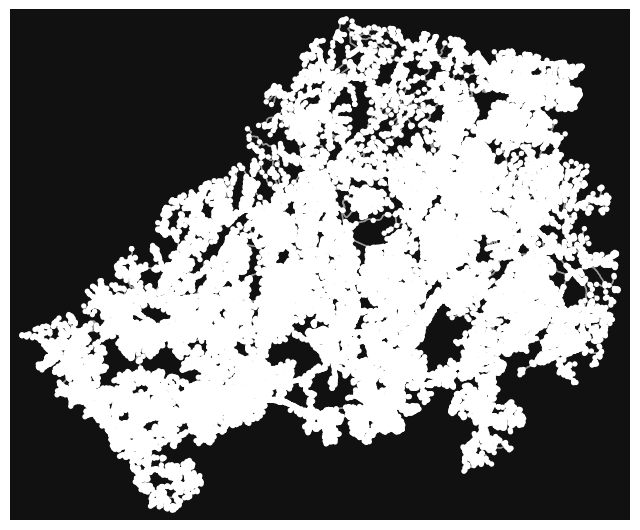

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
import osmnx as ox
G_full = ox.utils_graph.get_largest_component(G_full, strongly=True) 
ox.plot_graph(G_full)

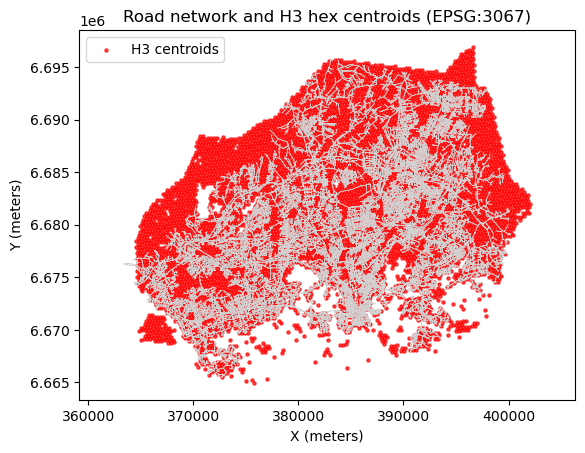

In [25]:
import matplotlib.pyplot as plt

# Plot all road edges
for u, v in G_full.edges():
    x1, y1 = G_full.nodes[u]['x'], G_full.nodes[u]['y']
    x2, y2 = G_full.nodes[v]['x'], G_full.nodes[v]['y']
    plt.plot([x1, x2], [y1, y2], color='lightgrey', linewidth=0.5)

# Plot centroids (red dots)
plt.scatter(h3_points_wgs.geometry.x, h3_points_wgs.geometry.y, color='red', s=5, alpha=0.7, label='H3 centroids')

plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('Road network and H3 hex centroids (EPSG:3067)')
plt.axis('equal')
plt.legend()
plt.show()


In [5]:
# G_full=G_test

In [7]:
import numpy as np
from scipy.spatial import cKDTree

# Extract node coordinates from the graph
node_xy = np.array([[data['x'], data['y']] for _, data in G_full.nodes(data=True)])
tree = cKDTree(node_xy)
node_ids = list(G_full.nodes)

# Prepare your hex centroid coordinates (already in the same CRS)
h3_points_wgs['hex_id'] = h3_points_wgs['id'].astype(str)
h3_xy = np.array([[geom.x, geom.y] for geom in h3_points_wgs.geometry])

# Query for the nearest node to each centroid
dists, idxs = tree.query(h3_xy, k=1)
h3_points_wgs['nearest_node'] = [node_ids[i] for i in idxs]
h3_points_wgs['nearest_node_dist_m'] = dists

print(f"Mapped {len(h3_points_wgs)} hexagons to network nodes. Example:")
print(h3_points_wgs[['hex_id', 'nearest_node', 'nearest_node_dist_m']].head())


Mapped 8540 hexagons to network nodes. Example:
            hex_id  nearest_node  nearest_node_dist_m
0  891126d4ecbffff          1125            48.470241
1  891126d2167ffff         44785            41.081996
2  891126c319bffff         44305           117.039406
3  891126da957ffff         31638          1051.832336
4  891126d768bffff         44054            74.960799


In [8]:
import osmnx as ox

# Prepare arrays of X (lon) and Y (lat) for all hex centroids
lons = h3_points_wgs.geometry.x.values
lats = h3_points_wgs.geometry.y.values

# Find nearest nodes using osmnx (returns a list of node IDs)
# If you have a lot of points, this vectorized method is efficient and reliable!
nearest_nodes = ox.distance.nearest_nodes(G_full, X=lons, Y=lats, return_dist=False)

# If you want distances as well
nearest_nodes_id, nearest_nodes_dist = ox.distance.nearest_nodes(G_full, X=lons, Y=lats, return_dist=True)

# Assign back to your dataframe
h3_points_wgs['nearest_node'] = nearest_nodes_id
h3_points_wgs['nearest_node_dist_m'] = nearest_nodes_dist

print(h3_points_wgs[['id', 'nearest_node', 'nearest_node_dist_m']].head())


                id  nearest_node  nearest_node_dist_m
0  891126d4ecbffff          1125            48.470241
1  891126d2167ffff         44785            41.081996
2  891126c319bffff         44305           117.039406
3  891126da957ffff         31638          1051.832336
4  891126d768bffff         44054            74.960799


In [9]:
# Build a dictionary: hex_id -> nearest_node
hex2node = dict(zip(h3_points_wgs['id'], h3_points_wgs['nearest_node']))

# Preview to make sure mapping exists
od_df['orig_node'] = od_df['origin_hex'].map(hex2node)
od_df['dest_node'] = od_df['destination_hex'].map(hex2node)

# Keep only OD pairs where both nodes are found
valid_od_df = od_df.dropna(subset=['orig_node', 'dest_node']).copy()
valid_od_df['orig_node'] = valid_od_df['orig_node'].astype(int)
valid_od_df['dest_node'] = valid_od_df['dest_node'].astype(int)

print(f"{len(valid_od_df)} OD pairs are mappable to road network nodes. Preview:")
print(valid_od_df.head())


12272726 OD pairs are mappable to road network nodes. Preview:
        origin_hex  destination_hex  orig_node  dest_node
0  891126d2167ffff  891126d3073ffff      44785       3982
1  891126c2683ffff  891126d2167ffff      31213      44785
2  8908996a98bffff  891126d2167ffff      16937      44785
3  8908996d6b3ffff  891126d2167ffff      30133      44785
4  89089961c6fffff  891126d2167ffff      25416      44785


In [ ]:
# # Check the first 5 nodes for 'lat' and 'lon'
# for n, data in list(G.nodes(data=True))[:5]:
#     print(f"Node {n}: keys = {list(data.keys())}")
#     print(f"  lat: {data.get('lat')}, lon: {data.get('lon')}")


In [10]:
G = G_full

In [ ]:
# attribute_names = set()
# for u, v, data in G.edges(data=True):
#     attribute_names.update(data.keys())
# print(attribute_names)


In [13]:
from shapely.geometry import LineString

for u, v, data in G.edges(data=True):
    geom = data.get('geometry', None)
    if geom is not None:
        # If your geometry is in meters (e.g., EPSG:3067), .length is in meters!
        data['length'] = geom.length
    else:
        data['length'] = 0  # Or maybe np.nan or skip


In [52]:
attribute_names = set()
for u, v, data in G.edges(data=True):
    attribute_names.update(data.keys())
print(attribute_names)

{'ENS_TALO_V', 'MTK_TIE_LK', 'KUNTAKOODI', 'MUOKKAUSPV', 'LINK_ID', 'HALLINN_LK', 'TIENIMI_RU', 'TIENIMI_SA', 'ENS_TALO_O', 'LET', 'TIEN_KASVU', 'LOPP_PAALU', 'SIJ_TARK', 'LINKKITYYP', 'SEGM_ID', 'ALKU_PAALU', 'length', 'LINK_TILA', 'GEOM_LAHDE', 'TIENIMI_SU', 'LINK_MMLID', 'TIEOSANRO', 'VIIM_TAL_O', 'KOR_TARK', 'AET', 'VIIM_TAL_V', 'TOIMINN_LK', 'AJORATA', 'TIENUMERO', 'geometry', 'SILTA_ALIK', 'GEOM_FLIP', 'AJOSUUNTA'}


In [14]:
import networkx as nx
results = []
n_test = 5  # Just run for first 5

for idx, row in valid_od_df.head(n_test).iterrows():
    orig_hex = row['origin_hex']
    dest_hex = row['destination_hex']
    orig_node = row['orig_node']
    dest_node = row['dest_node']
    print("orig_hex : ",orig_hex)
    print("dest_hex : ",dest_hex)
    print("orig_node : ",orig_node)
    print("dest_node : ",dest_node)
    try:
        # This will throw NetworkXNoPath if no route exists
        length = nx.dijkstra_path_length(G, source=orig_node, target=dest_node, weight='length')
        results.append({
            'origin_hex': orig_hex,
            'destination_hex': dest_hex,
            'orig_node': orig_node,
            'dest_node': dest_node,
            'shortest_distance_m': length
        })
        print(f"✓ Path: {orig_hex[:8]}… → {dest_hex[:8]}… | Distance: {length:.1f} m")
    except nx.NetworkXNoPath:
        print(f"✗ No path between {orig_hex} and {dest_hex}")
        results.append({
            'origin_hex': orig_hex,
            'destination_hex': dest_hex,
            'orig_node': orig_node,
            'dest_node': dest_node,
            'shortest_distance_m': None
        })
    

# Show results as DataFrame
df_test = pd.DataFrame(results)
print(df_test)


orig_hex :  891126d2167ffff
dest_hex :  891126d3073ffff
orig_node :  44785
dest_node :  3982
✓ Path: 891126d2… → 891126d3… | Distance: 9687.9 m
orig_hex :  891126c2683ffff
dest_hex :  891126d2167ffff
orig_node :  31213
dest_node :  44785
✓ Path: 891126c2… → 891126d2… | Distance: 13019.8 m
orig_hex :  8908996a98bffff
dest_hex :  891126d2167ffff
orig_node :  16937
dest_node :  44785
✓ Path: 8908996a… → 891126d2… | Distance: 18316.2 m
orig_hex :  8908996d6b3ffff
dest_hex :  891126d2167ffff
orig_node :  30133
dest_node :  44785
✓ Path: 8908996d… → 891126d2… | Distance: 8788.9 m
orig_hex :  89089961c6fffff
dest_hex :  891126d2167ffff
orig_node :  25416
dest_node :  44785
✓ Path: 89089961… → 891126d2… | Distance: 20236.6 m
        origin_hex  destination_hex  orig_node  dest_node  shortest_distance_m
0  891126d2167ffff  891126d3073ffff      44785       3982          9687.875018
1  891126c2683ffff  891126d2167ffff      31213      44785         13019.794990
2  8908996a98bffff  891126d2167ffff 

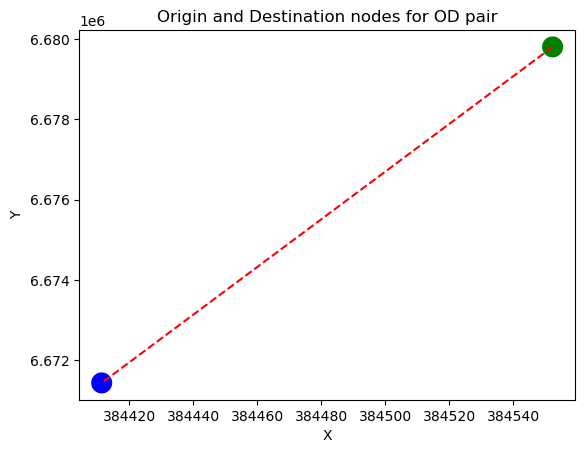

In [15]:
import matplotlib.pyplot as plt

# Pick one OD pair from your result
row = df_test.iloc[0]
x1, y1 = G.nodes[row['orig_node']]['x'], G.nodes[row['orig_node']]['y']
x2, y2 = G.nodes[row['dest_node']]['x'], G.nodes[row['dest_node']]['y']

plt.scatter([x1, x2], [y1, y2], color=['green', 'blue'], s=200)
plt.plot([x1, x2], [y1, y2], 'r--')
plt.title("Origin and Destination nodes for OD pair")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [65]:
import folium
from shapely.geometry import Point, LineString
import pyproj

# If using EPSG:3067 (meters), convert to WGS84 (EPSG:4326) for folium
proj_to_wgs = pyproj.Transformer.from_crs("EPSG:3067", "EPSG:4326", always_xy=True)

def to_wgs(x, y):
    return proj_to_wgs.transform(x, y)[1], proj_to_wgs.transform(x, y)[0]  # folium expects (lat, lon)

# Center map on Helsinki
m = folium.Map(location=[60.1699, 24.9384], zoom_start=11, control_scale=True)

for i, row in df_test.iterrows():
    orig_hex = row['origin_hex']
    dest_hex = row['destination_hex']
    orig_node = row['orig_node']
    dest_node = row['dest_node']

    # Get hex centroids (as shapely Points)
    hx1 = h3_points_wgs.loc[h3_points_wgs['hex_id'] == orig_hex].geometry.values[0]
    hx2 = h3_points_wgs.loc[h3_points_wgs['hex_id'] == dest_hex].geometry.values[0]
    # Reproject for folium
    hx1_latlon = to_wgs(hx1.x, hx1.y)
    hx2_latlon = to_wgs(hx2.x, hx2.y)
    
    # Plot centroids
    folium.Marker(hx1_latlon, icon=folium.Icon(color="green"), 
                  tooltip=f"Origin hex: {orig_hex[:8]}…").add_to(m)
    folium.Marker(hx2_latlon, icon=folium.Icon(color="blue"), 
                  tooltip=f"Dest hex: {dest_hex[:8]}…").add_to(m)

    # Plot mapped nodes
    node1_x, node1_y = G.nodes[orig_node]['x'], G.nodes[orig_node]['y']
    node2_x, node2_y = G.nodes[dest_node]['x'], G.nodes[dest_node]['y']
    node1_latlon = to_wgs(node1_x, node1_y)
    node2_latlon = to_wgs(node2_x, node2_y)
    folium.CircleMarker(node1_latlon, color="darkgreen", radius=7, fill=True).add_to(m)
    folium.CircleMarker(node2_latlon, color="darkblue", radius=7, fill=True).add_to(m)

    # Draw centroid-to-centroid line
    folium.PolyLine([hx1_latlon, hx2_latlon], color="orange", dash_array="5,5", weight=2, tooltip="Centroid-to-centroid").add_to(m)

    # If path exists, plot shortest path as polyline
    if not np.isnan(row['shortest_distance_m']):
        path_nodes = nx.shortest_path(G, source=orig_node, target=dest_node, weight='length')
        path_coords = [(G.nodes[n]['x'], G.nodes[n]['y']) for n in path_nodes]
        path_latlon = [to_wgs(x, y) for x, y in path_coords]
        folium.PolyLine(path_latlon, color="red", weight=4, opacity=0.8, tooltip=f"Network path ({row['shortest_distance_m']:.0f} m)").add_to(m)
    
    # Annotate with both distances
    centroid_dist = hx1.distance(hx2)
    popup_text = f"""
    <b>OD {i+1}</b><br>
    Origin: {orig_hex[:8]}…<br>
    Dest: {dest_hex[:8]}…<br>
    Centroid-to-centroid: <b>{centroid_dist:.1f} m</b><br>
    Network path: <b>{row['shortest_distance_m']:.1f} m</b>
    """
    folium.Marker(hx1_latlon, popup=folium.Popup(popup_text, max_width=300)).add_to(m)

# Save map
m.save("debug_od_map.html")
print("Map saved as debug_od_map.html. Open in browser to inspect!")


Map saved as debug_od_map.html. Open in browser to inspect!


In [16]:
import networkx as nx
import pandas as pd
from tqdm import tqdm

results = []

# 1. Group OD pairs by origin node
od_by_origin = valid_od_df.groupby('orig_node')

for orig_node, group in tqdm(od_by_origin, total=len(od_by_origin), desc="Processing origins"):
    # 2. Compute shortest path lengths from this origin to all reachable nodes
    lengths = nx.single_source_dijkstra_path_length(G, orig_node, weight='length')
    # 3. For each destination in this group
    for idx, row in group.iterrows():
        dest_node = row['dest_node']
        orig_hex = row['origin_hex']
        dest_hex = row['destination_hex']
        length = lengths.get(dest_node)  # None if not reachable
        results.append({
            'origin_hex': orig_hex,
            'destination_hex': dest_hex,
            'orig_node': orig_node,
            'dest_node': dest_node,
            'shortest_distance_m': length  # None if unreachable
        })

df_results = pd.DataFrame(results)
df_results.to_csv('hex_od_shortest_distances_all.csv', index=False)
print(f"Saved {len(df_results)} OD distances to hex_od_shortest_distances_all.csv")
print(df_results.head())


Processing origins: 100%|██████████| 4255/4255 [18:40<00:00,  3.80it/s]  


Saved 12272726 OD distances to hex_od_shortest_distances_all.csv
        origin_hex  destination_hex  orig_node  dest_node  shortest_distance_m
0  891126d055bffff  891126d2167ffff         10      44785          4520.086490
1  891126d055bffff  891126da98bffff         10      31638         13868.036525
2  891126d055bffff  891126d768bffff         10      44054          9007.425865
3  891126d055bffff  891126d3073ffff         10       3982          7003.970432
4  891126d055bffff  891126d72c3ffff         10      39459         10663.086868


In [57]:
import pyproj

# Set up transformer: from EPSG:3067 to WGS84
proj = pyproj.Transformer.from_crs("EPSG:3067", "EPSG:4326", always_xy=True)

for n, data in G.nodes(data=True):
    x, y = data['x'], data['y']
    lon, lat = proj.transform(x, y)
    G.nodes[n]['lat'] = lat
    G.nodes[n]['lon'] = lon

# Check again
for n, data in list(G.nodes(data=True))[:5]:
    print(f"Node {n}: lat = {data['lat']}, lon = {data['lon']}")


Node 1: lat = 60.22064672475178, lon = 24.616722235313777
Node 2: lat = 60.22161918113822, lon = 24.61655400347299
Node 3: lat = 60.2211993583506, lon = 24.68536638342093
Node 4: lat = 60.22125784384676, lon = 24.685577888950082
Node 5: lat = 60.172902755790574, lon = 25.03890271547243


In [63]:
import folium
import networkx as nx

orig_node = 16188
dest_node = 1809

# 1. Calculate the shortest path and its length
path_nodes = nx.shortest_path(G, source=orig_node, target=dest_node, weight='length')
length = nx.shortest_path_length(G, source=orig_node, target=dest_node, weight='length')
path_coords = [(G.nodes[n]['lat'], G.nodes[n]['lon']) for n in path_nodes]

# 2. Prepare folium map at the origin
start_lat, start_lon = G.nodes[orig_node]['lat'], G.nodes[orig_node]['lon']
m = folium.Map(location=[start_lat, start_lon], zoom_start=13, tiles='OpenStreetMap')

# # 3. Add road network
# folium.GeoJson(
#     links_filtered,
#     name='Road Network',
#     style_function=lambda x: {'color': 'gray', 'weight': 1, 'opacity': 0.4}
# ).add_to(m)

# 4. Add all hexagon centroids (optional)
for _, r in h3_points_wgs.iterrows():
    folium.CircleMarker(
        location=[r.geometry.y, r.geometry.x],
        radius=2,
        color='purple', fill=True, fill_opacity=0.7, opacity=0.7
    ).add_to(m)

# 5. Add the shortest path polyline
folium.PolyLine(
    path_coords,
    color='red', weight=5, opacity=0.8, tooltip=f"Shortest path: {length:.1f} m"
).add_to(m)

# 6. Add origin and destination markers (at node locations)
folium.Marker(
    [start_lat, start_lon],
    popup=f"Origin Node {orig_node}",
    icon=folium.Icon(color="green")
).add_to(m)
end_lat, end_lon = G.nodes[dest_node]['lat'], G.nodes[dest_node]['lon']
folium.Marker(
    [end_lat, end_lon],
    popup=f"Destination Node {dest_node}",
    icon=folium.Icon(color="blue")
).add_to(m)

# 7. Optionally: Add distance in a title/popup
folium.map.Popup(f"Shortest network distance: {length:.1f} meters").add_to(m)

# 8. Save and/or display
m.save("single_hex_path_map.html")
m
